<h1>NFL Draft Outcomes from 1985-2015</h1>

<p>
Results from every NFL draft from 1985-2015 including an Average Value(AV) of their career as determined by Pro Football Reference. Data also includes statistics during a players career, awards, some college info/awards, etc. As a football fan it should be intersting to see how much value teams get out of picks, how draft order affects a career etc. As a Jets fan I'm bracing myself for disappointment.

The Kaggle dateset can be found here;
https://www.kaggle.com/ronaldjgrafjr/nfl-draft-outcomes

Starting with standard imports;<p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
df = pd.read_csv("../Data/nfl_draft.csv")
df.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [4]:
df.tail()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
8430,NaN,1985,12.0,332,RAI,Raymond Polk,DB,DB,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oklahoma St.,NaN,NaN
8431,NaN,1985,12.0,333,BUF,Paul Woodside,K,K,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Virginia,NaN,NaN
8432,NaN,1985,12.0,334,DEN,Dan Lynch,G,G,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington St.,NaN,NaN
8433,NaN,1985,12.0,335,MIA,Ray Noble,DB,DB,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,NaN,NaN
8434,NaN,1985,12.0,336,SFO,Donald Chumley,DT,DT,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Georgia,NaN,NaN


<p>Sure enough all players drafted including 1985 the year the Jets passed up on the great Jerry Rice 
<p>

In [5]:
list(df)

['Player_Id',
 'Year',
 'Rnd',
 'Pick',
 'Tm',
 'Player',
 'Pos',
 'Position Standard',
 'First4AV',
 'Age',
 'To',
 'AP1',
 'PB',
 'St',
 'CarAV',
 'DrAV',
 'G',
 'Cmp',
 'Pass_Att',
 'Pass_Yds',
 'Pass_TD',
 'Pass_Int',
 'Rush_Att',
 'Rush_Yds',
 'Rush_TDs',
 'Rec',
 'Rec_Yds',
 'Rec_Tds',
 'Tkl',
 'Def_Int',
 'Sk',
 'College/Univ',
 'Unnamed: 32']

<p>This list doesn't include a career length but that's an easy addition:<p>

In [6]:
df['Career length']=df['To']-df['Year']+1

In [7]:
df.describe()

,Year,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Career length
count,8435.000000,8211.000000,8435.000000,8435.00000,7190.000000,7053.000000,8435.000000,8435.000000,8435.000000,7053.000000,...,594.000000,1646.000000,1646.000000,1646.000000,2171.000000,2171.000000,2171.000000,4111.000000,1616.000000,7053.000000
mean,1999.197629,4.966508,139.141316,9.92709,22.639499,2004.610804,0.073622,0.275874,1.830587,17.276195,...,18.915825,202.143378,827.727825,5.801944,105.699678,1243.660525,7.409949,86.745804,9.211943,5.642705
std,9.180569,2.788304,83.237196,13.13477,0.844544,9.061308,0.465718,1.106443,2.972463,22.390409,...,40.940416,453.280726,1914.291647,13.950791,170.804626,2237.914954,15.079805,149.519255,15.989047,3.580205
min,1985.000000,1.000000,1.000000,-4.00000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.500000,1.000000
25%,1991.000000,3.000000,69.000000,0.00000,22.000000,1997.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,11.000000,0.000000,4.000000,41.000000,0.000000,4.000000,1.000000,3.000000
50%,1999.000000,5.000000,137.000000,4.00000,23.000000,2006.000000,0.000000,0.000000,0.000000,8.000000,...,1.000000,22.000000,94.000000,0.000000,34.000000,315.000000,1.000000,17.000000,3.500000,5.000000
75%,2007.000000,7.000000,205.000000,16.00000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,16.750000,179.750000,655.500000,5.000000,136.500000,1383.500000,8.000000,102.000000,10.000000,8.000000
max,2015.000000,12.000000,336.000000,88.00000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,336.000000,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.000000,21.000000


<p>Interesting the average career is 5.64 years<p>

<p>The Harvard Sports Analysis Collective formula for the average value of a pick in the draft
https://harvardsportsanalysis.wordpress.com/2011/11/30/how-to-value-nfl-draft-picks/
<p>

In [8]:
df['HSAC'] = df['Pick'].apply(lambda x: (-0.855 * math.log(x*math.pi / 180) + 4.9663)) 

In [9]:
df['AV Ratio']=(df['First4AV']/df['HSAC'])

In [10]:
df.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32,Career length,HSAC,AV Ratio
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN,2.0,8.427534,1.542563
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,41.0,1.0,NaN,NaN,NaN,Oregon,NaN,2.0,7.834893,1.148707
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,16.0,NaN,2.5,Florida,NaN,2.0,7.488221,0.000000
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN,2.0,7.242252,1.242707
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,Iowa,NaN,2.0,7.051465,0.992702


In [11]:
df.sort_values(['AV Ratio','HSAC'], ascending=False)

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32,Career length,HSAC,AV Ratio
5262,DaviTe00,1995,6.0,196,DEN,Terrell Davis,RB,RB,70,22.0,...,1280.0,5.0,1.0,NaN,NaN,Georgia,NaN,7.0,3.914746,17.881109
1172,SherRi00,2011,5.0,154,SEA,Richard Sherman,DB,DB,72,23.0,...,NaN,NaN,248.0,30.0,1,Stanford,NaN,6.0,4.120940,17.471744
7137,ThomTh00,1988,2.0,40,BUF,Thurman Thomas HOF,RB,RB,84,22.0,...,4458.0,23.0,NaN,NaN,Oklahoma St.,NaN,NaN,13.0,5.273542,15.928573
4966,ThomZa01,1996,5.0,154,MIA,Zach Thomas,LB,LB,64,23.0,...,NaN,NaN,1100.0,17.0,20.5,Texas Tech,NaN,13.0,4.120940,15.530439
4209,BrooAa00,1999,4.0,131,GNB,Aaron Brooks,QB,QB,64,23.0,...,1.0,0.0,11.0,NaN,NaN,Virginia,NaN,8.0,4.259240,15.026154
840,WilsRu00,2012,3.0,75,SEA,Russell Wilson,QB,QB,70,23.0,...,31.0,1.0,4.0,NaN,NaN,Wisconsin,NaN,5.0,4.736082,14.780150
6142,WattRi00,1991,2.0,45,SFO,Ricky Watters,RB,RB,74,22.0,...,4248.0,13.0,NaN,NaN,Notre Dame,NaN,NaN,11.0,5.172838,14.305494
1029,WattJ.00,2011,1.0,11,HOU,J.J. Watt,DE,DE,88,22.0,...,4.0,3.0,299.0,1.0,76,Wisconsin,NaN,6.0,6.377334,13.798870
2398,EvanJa21,2006,4.0,108,NOR,Jahri Evans,T,T,61,23.0,...,NaN,NaN,6.0,NaN,NaN,Bloomsburg,NaN,11.0,4.424312,13.787455
1947,NickCa20,2008,5.0,164,NOR,Carl Nicks,T,T,56,23.0,...,NaN,NaN,2.0,NaN,NaN,Nebraska,NaN,6.0,4.067148,13.768861


<p>Denver Bronco great Terrell Davis tops the list for the pick with the most career value for when he was selected, surprising that Tom Brady and Antonio Brown aren't higher on this list but Pro Football Reference AV is only for the first four years. The Jets don't break the top 30 for drafting but HOFer Curtis Martin is on this list stolen from the Patriots arguably had his best years with the Jets.<p>

In [12]:
#Just for fun I'd like to know who had -19 yards receiving
df.sort_values(['Rec_Yds'])

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32,Career length,HSAC,AV Ratio
6763,AikmTr00,1989,1.0,1,DAL,Troy Aikman HOF,QB,QB,53,22.0,...,-19.0,0.0,NaN,NaN,UCLA,NaN,NaN,12.0,8.427534,6.288910
1028,GabbBl00,2011,1.0,10,JAX,Blaine Gabbert,QB,QB,13,21.0,...,-16.0,0.0,1.0,NaN,NaN,Missouri,NaN,6.0,6.458824,2.012750
1030,PondCh00,2011,1.0,12,MIN,Christian Ponder,QB,QB,23,23.0,...,-15.0,0.0,5.0,NaN,NaN,Florida St.,NaN,4.0,6.302939,3.649091
4079,CoucTi00,1999,1.0,1,CLE,Tim Couch,QB,QB,32,22.0,...,-13.0,0.0,1.0,NaN,NaN,Kentucky,NaN,5.0,8.427534,3.797078
5071,CollKe00,1995,1.0,5,CAR,Kerry Collins,QB,QB,27,22.0,...,-13.0,0.0,6.0,NaN,NaN,Penn St.,NaN,17.0,7.051465,3.828992
8,FlowEr00,2015,1.0,9,NYG,Ereck Flowers,T,T,9,21.0,...,-11.0,0.0,NaN,NaN,NaN,Miami (FL),NaN,2.0,6.548907,1.374275
8080,SingRe20,1986,12.0,315,PHI,Reggie Singletary,G,G,19,22.0,...,-11.0,0.0,NaN,1.0,North Carolina St.,NaN,NaN,5.0,3.509084,5.414518
2811,RoetBe00,2004,1.0,11,PIT,Ben Roethlisberger,QB,QB,57,22.0,...,-11.0,0.0,8.0,NaN,NaN,Miami (OH),NaN,13.0,6.377334,8.937905
2546,SmitAl03,2005,1.0,1,SFO,Alex Smith,QB,QB,14,21.0,...,-10.0,0.0,9.0,NaN,NaN,Utah,NaN,12.0,8.427534,1.661221
4422,GrieBr00,1998,3.0,91,DEN,Brian Griese,QB,QB,42,23.0,...,-10.0,0.0,7.0,NaN,NaN,Michigan,NaN,11.0,4.570749,9.188866


<p>Future Hall of Famer Troy Aikmen? Must have been a heck of a fleaflicker scramble<p>

In [13]:
#using Our value per pick ratio let's see what team gets the most value out of their picks
df.groupby('Tm').mean().sort_values(['AV Ratio','HSAC'], ascending=False)

,Year,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Career length,HSAC,AV Ratio
Tm,,,,,,,,,,,,,,,,,,,,,
BAL,2005.734568,4.203704,130.067901,11.783951,22.649007,2010.551724,0.160494,0.469136,1.993827,18.682759,...,837.194444,5.333333,78.076923,874.230769,5.173077,94.263158,8.379310,5.682759,4.488802,2.363589
GNB,1998.941748,5.010000,142.165049,10.915858,22.683594,2005.101562,0.055016,0.249191,1.899676,19.191406,...,678.564516,4.661290,131.986111,1599.083333,11.194444,78.284768,10.319672,5.851562,4.402622,2.344007
CAR,2004.503106,4.124224,122.652174,11.739130,22.655405,2009.650350,0.118012,0.316770,2.080745,18.538462,...,894.354839,6.612903,101.348837,1241.511628,7.162791,102.629310,7.562500,5.825175,4.571383,2.327628
JAX,2004.346591,4.250000,126.238636,11.289773,22.772152,2008.980892,0.034091,0.119318,1.965909,16.528662,...,1056.540541,7.432432,71.129630,758.259259,4.407407,98.154472,6.928571,5.273885,4.588917,2.230375
TEN,2005.845238,4.232143,127.065476,10.625000,22.616352,2010.018868,0.059524,0.142857,1.791667,14.679245,...,555.000000,3.861111,78.169811,928.452830,5.075472,93.741935,6.333333,5.062893,4.498492,2.227417
PIT,1998.473510,5.041096,143.271523,10.536424,22.568182,2003.906615,0.135762,0.370861,2.132450,20.420233,...,647.206897,4.793103,113.000000,1401.976471,8.470588,95.911765,8.090164,6.280156,4.391486,2.214343
PHI,1999.257840,4.946237,139.871080,10.560976,22.646091,2004.708333,0.066202,0.268293,1.780488,17.333333,...,974.814815,6.277778,123.121212,1403.136364,8.363636,79.646259,9.241667,5.666667,4.440263,2.211579
SFO,1999.996324,4.830189,139.558824,10.474265,22.625532,2005.740088,0.147059,0.400735,1.944853,19.132159,...,829.285714,6.125000,131.466667,1587.493333,10.920000,84.257143,10.261905,6.066079,4.456984,2.164351
ARI,2003.869318,4.125000,119.500000,10.727273,22.570552,2008.487342,0.051136,0.295455,2.107955,17.316456,...,793.475000,5.475000,129.204082,1513.510204,7.938776,112.052174,7.896552,5.354430,4.625155,2.143784


<p>Looks like the Ravens get the most value out of their picks. Does that mean they draft better? Green bay is second and they're well known for putting a lot of emphasis on the draft. Jacksonville, Tennesse, Baltimore and Carolina are all newer franchises that are four of the top five perhaps the drafting process has gotten more refined or the data going back is corrupt which is worth looking into.<p>

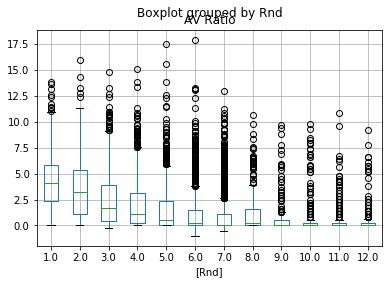

In [18]:
df[['Rnd', 'AV Ratio']].boxplot(by='Rnd')